In [ ]:
# importingh libraries
import sklearn
import numpy as np

# using seed to remember the random shuffling
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



In [ ]:
# Importing mnist
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame=False)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

5


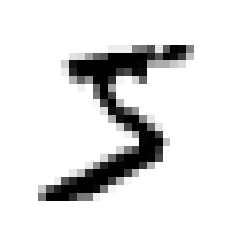

In [ ]:
#plotting a single image
print(y[0])
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28 )
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
y = y.astype(np.uint8)

In [ ]:
# Function for plotting a digit as a image
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# Using KNeighbors Classifier

In [ ]:
# Splitting train and test data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [ ]:
# Creating the KNN classifier and training
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors = 4)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
# Predicting the test data
y_knn_pred = knn_clf.predict(X_test)

In [ ]:
# Testing the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

In [ ]:
# Hyper paramater tuning 

from sklearn.model_selection import GridSearchCV

param_grid = [{'weights' : ['uniform','distance'], 'n_neighbors' : [3,4,5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv= 5, verbose = 3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  32.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  30.7s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  30.6s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  30.7s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  32.9s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  30.3s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  30.3s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  31.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  30.3s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  30.3s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  34.3s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
# Getting the best set of parameters
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
# Getting the best score
grid_search.best_score_

0.9716166666666666

In [ ]:
# Testing accuracy with best model
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

[7]


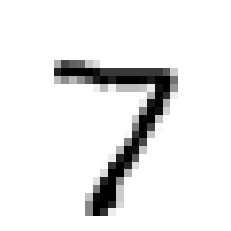

In [ ]:
# testing with a sample
plot_digit(X_test[0])
print(grid_search.predict([X_test[0]]))


In [ ]:
# Dumping the model using pickle
import pickle
with open('knn_pkl','wb') as files:
  pickle.dump(knn_clf, files) 

In [ ]:
# Testing the pickle import
with open('knn_pkl','rb') as f:
  knn_clf = pickle.load(f)
knn_clf.predict([X[0]])

array([5], dtype=uint8)

(500, 500)
(28, 28)


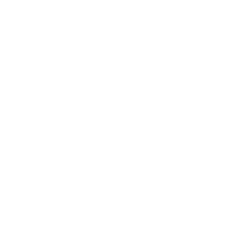

In [ ]:
# Sample run of image processing and prediction
from PIL import Image
im = Image.open('image.png')
print(im.size)

im = im.resize((28,28))
im = im.convert('L')
im = np.array(im)
plot_digit(im)
print(im.shape)


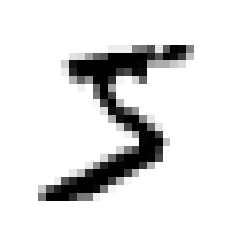

In [ ]:
plot_digit(X[0])